<a href="https://colab.research.google.com/github/TannuShree119/Parkinsons-Disease-Prediction-Model/blob/main/Parkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parkinson's Disease Prediction Model**

The project focuses on building a machine learning model to predict the presence of Parkinson's disease based on various biomedical voice measurements which are:

1. name - ASCII subject name and recording number
2. MDVP:Fo(Hz) - Average vocal fundamental frequency
3. MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
4. MDVP:Flo(Hz) - Minimum vocal fundamental frequency
5. MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
measures of variation in fundamental frequency
6. MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
7. NHR, HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
8. RPDE, D2 - Two nonlinear dynamical complexity measures
9. DFA - Signal fractal scaling exponent
10. spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

The dataset used in this project contains biomedical voice measurements from people with and without Parkinson's disease. The dataset is loaded, explored, and preprocessed to prepare it for model training. The features are standardized to ensure that all features have the same scale, which is a requirement for the Support Vector Machine (SVM) algorithm used for classification.


The overall goal of the project is to develop a predictive model that can accurately identify the presence of Parkinson's disease based on biomedical voice measurements, which can assist healthcare professionals in the early diagnosis and treatment of the disease.







In [ ]:
# Importing all important libraries for this project

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

## **Data Loading and Exploration**

In this section, the Parkinson's disease dataset is loaded from a CSV file and explored to understand its structure, dimensions, data types, missing values, and target variable distribution.

In [ ]:
# Loading the CSV file
parkinsons_data = pd.read_csv("/content/parkinsons.csv")

In [ ]:
# Displaying the first few rows of the dataset to understand its structure
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# Checking the dimensions of the dataset to understand its size
parkinsons_data.shape

(195, 24)

In [ ]:
# Obtaining a summary of the dataset, including data types and non-null counts
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
# Checking for missing values in the dataset to ensure data completeness
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
# Generating descriptive statistics to understand the distribution and central tendency of the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# Counting the number of instances for each class in the 'status' column to understand the distribution of the target variable
parkinsons_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

## **Data Preprocessing**

This section involves preprocessing the dataset by separating the features and the target variable, calculating the correlation matrix, visualizing the feature distributions, and standardizing the data.

In [ ]:
# Separating the features (x) and the target variable (y) from the dataset
x = parkinsons_data.drop(columns = ['name', 'status'], axis = 1)
y = parkinsons_data['status']

In [ ]:
print(x)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [ ]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


## **Visualizing our dataset**

 By visualizing the data, we gain insights into the relationships between features and the distribution of the target variable, which helps in understanding the dataset better and making informed decisions during the modeling process.

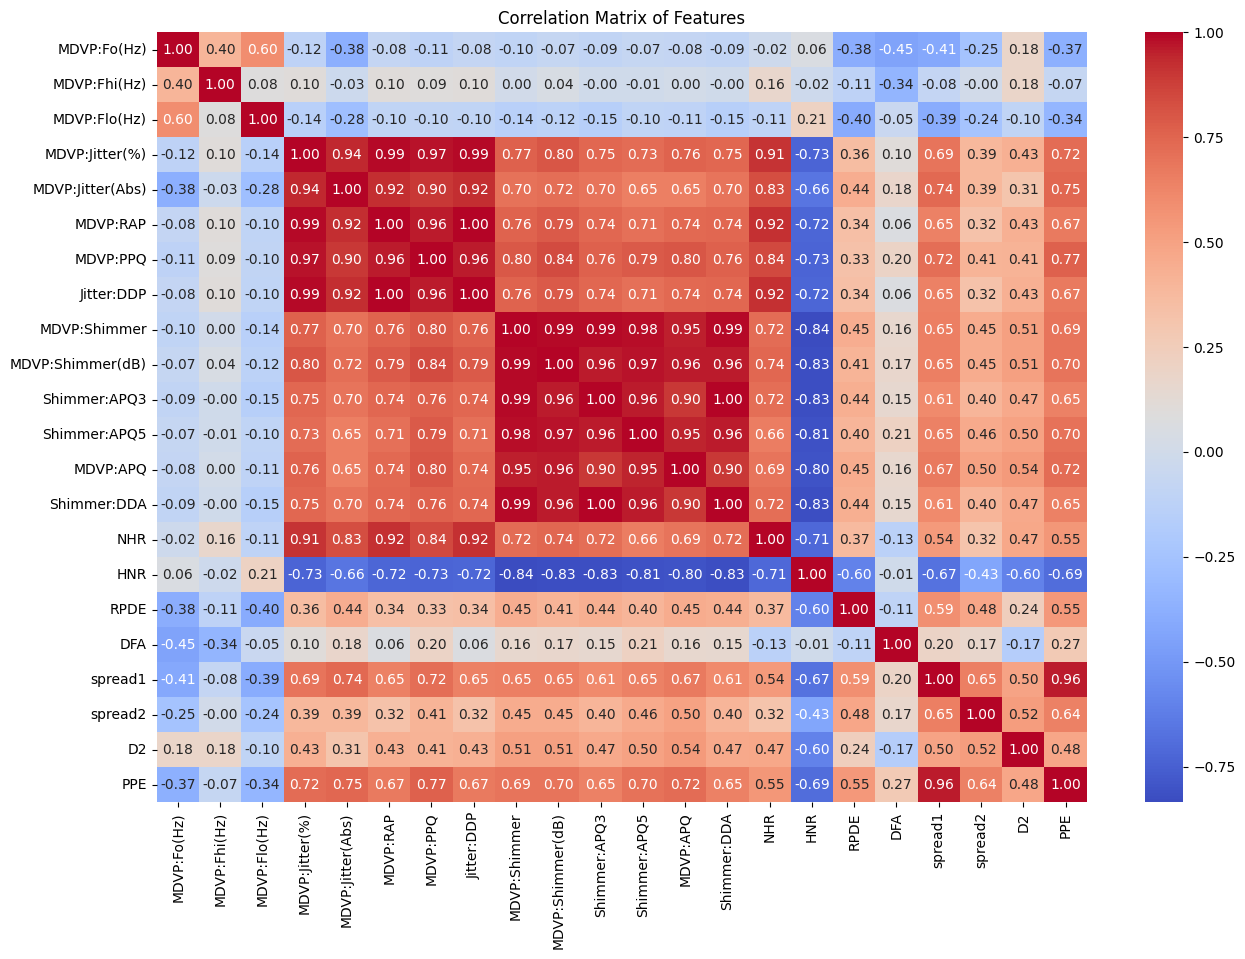

In [ ]:
# Calculating the correlation matrix to understand the relationships between features
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = x.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


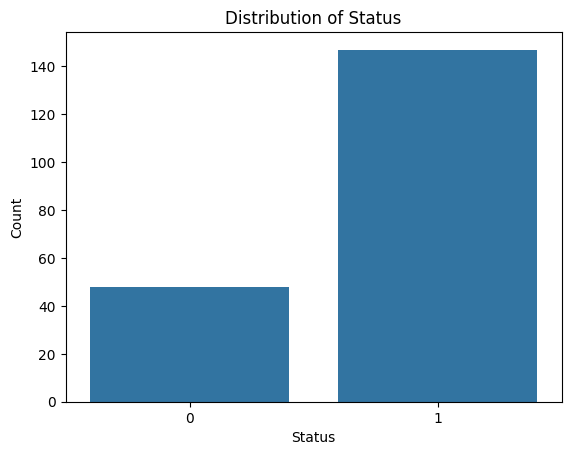

In [ ]:
# Visualizing the correlation matrix using a heatmap to identify correlated features
sns.countplot(x=y)
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


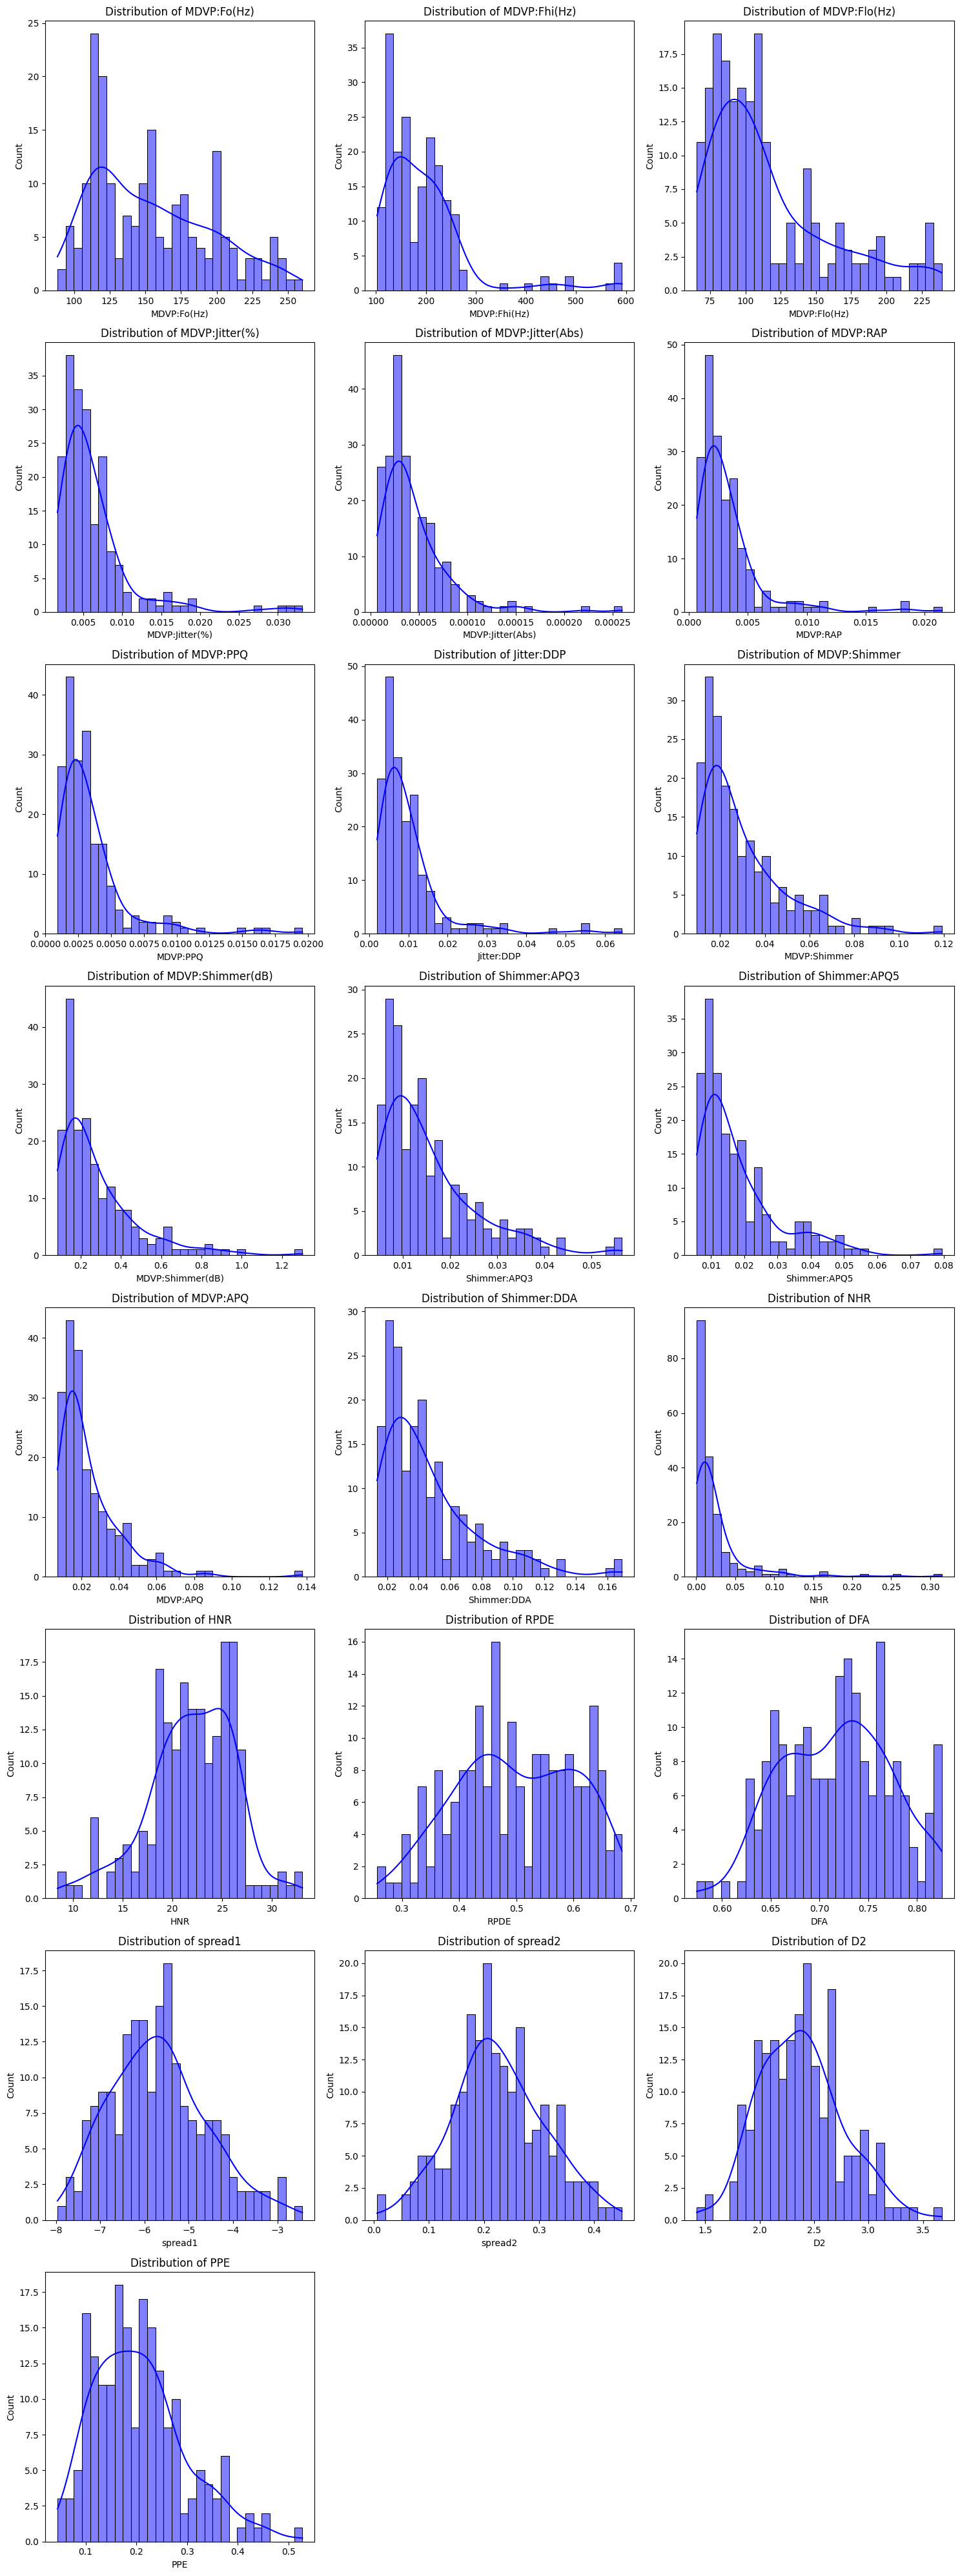

In [ ]:
# Visualizing the distribution of each feature to understand their distributions
features = x.columns
num_features = len(features)
num_rows = (num_features // 3) + (num_features % 3 > 0)  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))

for i, feature in enumerate(features):
    plt.subplot(num_rows, 3, i+1)
    sns.histplot(x[feature], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


## **Data Splitting**

Here, the dataset is split into training and testing sets using the train_test_split function to prepare the data for model training and evaluation.

In [ ]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

In [ ]:
# Displaying the dimensions of the original and split datasets to verify the split
print(x.shape, x_train.shape, x_test.shape)

(195, 22) (156, 22) (39, 22)


## **Data Standardization**

The features in the training and testing sets are standardized using StandardScaler to ensure that all features have the same scale, which is a requirement for many machine learning algorithms, including SVM.

In [ ]:
# Initializing the StandardScaler to scale the data
scaler = StandardScaler()

In [ ]:
# Fitting the scaler on the training data to compute the mean and standard deviation
scaler.fit(x_train)

StandardScaler()

In [ ]:
# Transforming the training and testing data using the fitted scaler to standardize the data
x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)

In [ ]:
# Displaying the standardized training data to verify the transformation
print(x_train)

[[-0.16819857  0.22629182 -0.83791837 ... -0.34570641 -0.09091189
  -0.44537292]
 [ 0.7757276   0.08902002  1.29455556 ... -0.2861069   0.06380775
  -0.79700594]
 [-0.9990015  -0.80030161 -0.34048128 ...  0.96627053  0.18057631
   0.05524759]
 ...
 [-0.40529647 -0.30011056 -1.18795762 ... -0.23161627 -0.14945383
   0.24009742]
 [-1.18719615  0.19253974 -0.92177382 ...  0.14072248  1.2844657
   0.16712639]
 [-0.923594   -0.84407052 -0.2394943  ... -0.32379079 -0.96797356
  -0.21704176]]


## **Model Training**

Support Vector Machine Model

The Support Vector Machine (SVM) model is initialized with a linear kernel and trained on the standardized training data.

In [ ]:
# Initializing the Support Vector Machine classifier with a linear kernel
model = svm.SVC(kernel = 'linear')

In [ ]:
# Training the Support Vector Machine model on the standardized training data
model.fit(x_train, y_train)

SVC(kernel='linear')

## **Model Evaluation**

The model's performance is evaluated using the accuracy score on both the training and testing datasets to assess its predictive power.

In [ ]:
# Predicting the training data labels using the trained model
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)

In [ ]:
# Calculating the accuracy of the model on the training data
print('Accuracy score of training data:', training_data_accuracy)

Accuracy score of training data: 0.9166666666666666


In [ ]:
# Displaying the accuracy score of the training data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)

In [ ]:
# Generating the confusion matrix to evaluate the model's performance
print('Accuracy score of test data:', test_data_accuracy)

Accuracy score of test data: 0.8974358974358975


## **Visualizing how well our model predicted**

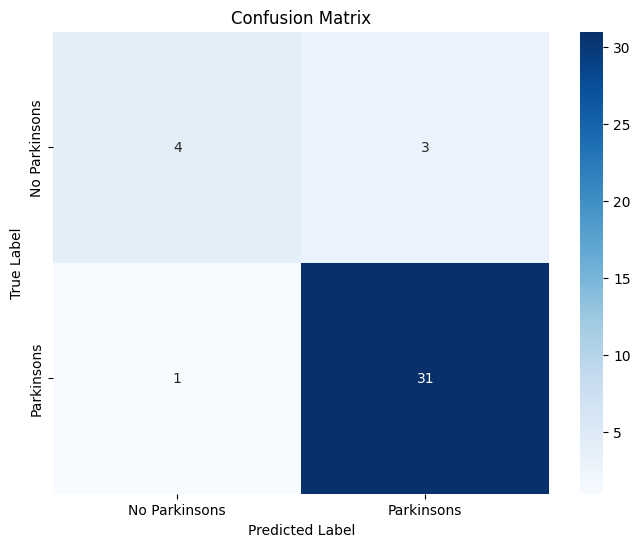

In [ ]:
# Generating the confusion matrix to evaluate the model's performance
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, x_test_prediction)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['No Parkinsons', 'Parkinsons'], yticklabels=['No Parkinsons', 'Parkinsons'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## **Building a Predictive System**

An example input data is prepared, standardized, and used to make a prediction using the trained SVM model. The prediction result is then displayed to interpret the model's prediction.

In [ ]:
# Define input data for prediction
input_data = (91.90400,115.87100,86.29200,0.00540,0.00006,0.00281,0.00336,0.00844,0.02752,0.24900,0.01424,0.01641,0.02214,0.04272,0.01141,21.41400,0.583390,0.792520,-4.960234,0.363566,2.642476,0.275931)

# Convert input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the input data to match the input shape of the model
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data using the same scaler used for the training data
std_data = scaler.transform(input_data_reshaped)

# Make a prediction using the trained model
prediction = model.predict(std_data)

# Print the prediction result
print(prediction)

# Interpret the prediction result
if (prediction[0] == 0):
  print("The patient does not have Parkinsons")
else:
  print("The patient has Parkinsons")


[1]
The patient has Parkinsons


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **Saving the Model**

The trained SVM model is saved to a file using the pickle library, and then loaded back to verify the saved model's integrity and to display the feature names used in the model.

In [ ]:
import pickle

In [ ]:
# Saving the trained model to a file
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb') )

In [ ]:
# Loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
# Displaying the feature names
for column in x.columns:
  print(column)

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE
